<div class="alert alert-success">
    <h1 align="center">Lesson 01: Image Classification (Cats vs Dogs)</h1>
    <h3 align="center"><a href="http://www.snrazavi.ir">Seyed Naser RAZAVI</a></h3>
</div>

<h6 align='center'>Kaggle competition: [Dogs vs. Cats](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition)</h6>

<img src='https://github.com/itisalirh/Deep_Learning_in_Python_2018/blob/master/Week01/imgs/catsanddogs.png?raw=1' width='90%'/>

## Objectives

- Image classification
- Four key components of any ML system (in PyTorch):
 - Data (Images)
 - Model (CNN)
 - Loss (Cross Entropy)
 - Optimization (SGD, Adam, ..)
- Convolutional Neural Networks (CNNs)
- Overfit
- Data augmentation
- Transfer learning

## Image Classification

<img src='https://github.com/itisalirh/Deep_Learning_in_Python_2018/blob/master/Week01/imgs/Image_tasks.jpg?raw=1' width='80%'/>

## Download utils to use in Google Colab

In [1]:
import os
if not os.path.exists('train.py'):
  !wget https://raw.githubusercontent.com/itisAliRH/Deep_Learning_in_Python_2018/master/Week01/train.py
if not os.path.exists('utils.py'):
  !wget https://raw.githubusercontent.com/itisAliRH/Deep_Learning_in_Python_2018/master/Week01/utils.py
if not os.path.exists('model_utils.py'):
  !wget https://raw.githubusercontent.com/itisAliRH/Deep_Learning_in_Python_2018/master/Week01/model_utils.py
if not os.path.exists('predict_utils.py'):
  !wget https://raw.githubusercontent.com/itisAliRH/Deep_Learning_in_Python_2018/master/Week01/predict_utils.py
if not os.path.exists('vis_utils.py'):
  !wget https://raw.githubusercontent.com/itisAliRH/Deep_Learning_in_Python_2018/master/Week01/vis_utils.py

--2020-06-16 16:00:03--  https://raw.githubusercontent.com/itisAliRH/Deep_Learning_in_Python_2018/master/Week01/train.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3431 (3.4K) [text/plain]
Saving to: ‘train.py’

train.py            100%[===================>]   3.35K  --.-KB/s    in 0s      

2020-06-16 16:00:03 (60.9 MB/s) - ‘train.py’ saved [3431/3431]

--2020-06-16 16:00:05--  https://raw.githubusercontent.com/itisAliRH/Deep_Learning_in_Python_2018/master/Week01/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 966 [text/plain

## Libraries

In [2]:
!pip install tqdm
!pip install image
!pip install torch torchvision
!pip install bcolz

     |████████████████████████████████| 1.5MB 10.7MB/s 
  Created wheel for bcolz: filename=bcolz-1.2.1-cp36-cp36m-linux_x86_64.whl size=2663528 sha256=3a12db511ccacf3413062ff1b2efcb0f29263bd6a4098c1d09b4233e5cebf352
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
Successfully built bcolz


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import math
import time
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
from sklearn.metrics import confusion_matrix

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

import torchvision
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms

# Our libraries
from train import train_model
from model_utils import *
from predict_utils import *
from vis_utils import *

# some initial setup
np.set_printoptions(precision=2)
use_gpu = torch.cuda.is_available()
np.random.seed(1234)

In [4]:
use_gpu

True

## Download and use Small Dataset

In [5]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2020-06-16 16:01:18--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.240, 2607:f8b0:4004:815::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  77.7MB/s    in 0.8s    

2020-06-16 16:01:19 (77.7 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [6]:
!unzip 'cats_and_dogs_filtered.zip'

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2117.

In [7]:
cd './cats_and_dogs_filtered'

/content/cats_and_dogs_filtered


## IF YOU DO NOT USE SMALL DATASET,
Mount Google Drive and unzip dataset in Colab

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
cd './drive/My Drive/Image Classification (Cats vs Dogs)'

In [0]:
ls

In [0]:
!unzip 'dogs-vs-cats-redux-kernels-edition.zip'

In [0]:
ls

In [0]:
!unzip 'train.zip'

In [0]:
ls ./train | wc -l

In [0]:
!unzip 'test.zip'

In [0]:
ls ./test | wc -l

In [0]:
!cd train
!mkdir cat
!mv cat.*.jpg cat
!ls ./cat | wc -l
!mkdir dog
!mv dog.*.jpg dog
!ls ./dog | wc -l
!cd ..

In [0]:
!mkdir valid
!cp -R './train/cat' './train/dog' './valid'

## Data

- train: learning the **parameters** of the model.
- valid: learning **hyper-parameters**.
- test
- development

In [0]:
# DATA_DIR in Colab = "./drive/My Drive/Image Classification (Cats vs Dogs)"
# DATA_DIR in Local = "<....>"

DATA_DIR = './'
sz = 224
batch_size = 16

In [10]:
os.listdir(DATA_DIR)

['vectorize.py', 'train', 'validation']

In [0]:
trn_dir = f'{DATA_DIR}train'
val_dir = f'{DATA_DIR}validation'

In [12]:
os.listdir(trn_dir)

['cats', 'dogs']

In [13]:
trn_fnames = glob.glob(f'{trn_dir}/*/*.jpg')
trn_fnames[:5]

['./train/cats/cat.977.jpg',
 './train/cats/cat.807.jpg',
 './train/cats/cat.306.jpg',
 './train/cats/cat.736.jpg',
 './train/cats/cat.703.jpg']

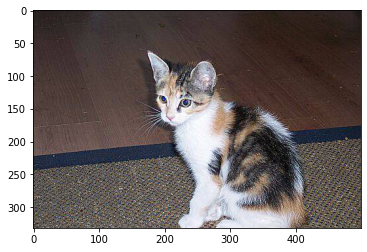

In [14]:
img = plt.imread(trn_fnames[3])
plt.imshow(img);

### Datasets and Dataloaders in PyTorch

- <h6>Dataset</h6>A set of images.
- <h6>Dataloader</h6>Loads data from dataset behind the scene using concurrent threads.

In [0]:
train_ds = datasets.ImageFolder(trn_dir)

In [16]:
train_ds.classes

['cats', 'dogs']

In [17]:
train_ds.class_to_idx

{'cats': 0, 'dogs': 1}

In [18]:
train_ds.root

'./train'

In [19]:
train_ds.imgs

[('./train/cats/cat.0.jpg', 0),
 ('./train/cats/cat.1.jpg', 0),
 ('./train/cats/cat.10.jpg', 0),
 ('./train/cats/cat.100.jpg', 0),
 ('./train/cats/cat.101.jpg', 0),
 ('./train/cats/cat.102.jpg', 0),
 ('./train/cats/cat.103.jpg', 0),
 ('./train/cats/cat.104.jpg', 0),
 ('./train/cats/cat.105.jpg', 0),
 ('./train/cats/cat.106.jpg', 0),
 ('./train/cats/cat.107.jpg', 0),
 ('./train/cats/cat.108.jpg', 0),
 ('./train/cats/cat.109.jpg', 0),
 ('./train/cats/cat.11.jpg', 0),
 ('./train/cats/cat.110.jpg', 0),
 ('./train/cats/cat.111.jpg', 0),
 ('./train/cats/cat.112.jpg', 0),
 ('./train/cats/cat.113.jpg', 0),
 ('./train/cats/cat.114.jpg', 0),
 ('./train/cats/cat.115.jpg', 0),
 ('./train/cats/cat.116.jpg', 0),
 ('./train/cats/cat.117.jpg', 0),
 ('./train/cats/cat.118.jpg', 0),
 ('./train/cats/cat.119.jpg', 0),
 ('./train/cats/cat.12.jpg', 0),
 ('./train/cats/cat.120.jpg', 0),
 ('./train/cats/cat.121.jpg', 0),
 ('./train/cats/cat.122.jpg', 0),
 ('./train/cats/cat.123.jpg', 0),
 ('./train/cats/cat.1

In [0]:
# list(zip(*train_ds.imgs))

In [21]:
type(train_ds.transform)

NoneType

### Transformations

Dataloader object uses these tranformations when loading data.

In [0]:
tfms = transforms.Compose([
    transforms.Resize((sz, sz)),  # PIL Image
    transforms.ToTensor(),        # Tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_ds = datasets.ImageFolder(trn_dir, transform=tfms)
valid_ds = datasets.ImageFolder(val_dir, transform=tfms)

In [23]:
len(train_ds), len(valid_ds)

(2000, 1000)

#### Dataloaders

In [0]:
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, 
                                       shuffle=True, num_workers=8)
valid_dl = torch.utils.data.DataLoader(valid_ds, batch_size=batch_size, 
                                       shuffle=True, num_workers=8)

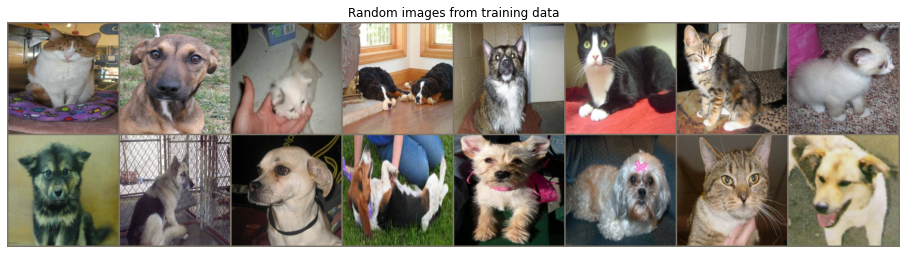

In [25]:
inputs, targets = next(iter(train_dl))
out = torchvision.utils.make_grid(inputs, padding=3)
plt.figure(figsize=(16, 12))
imshow(out, title='Random images from training data')

In [0]:
# ??imshow

## Model: CNN

<img src='https://github.com/itisalirh/Deep_Learning_in_Python_2018/blob/master/Week01/imgs/DogAndCats-CNN.jpg?raw=1' width='100%'/>

In [0]:
class SimpleCNN(nn.Module):
    
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc = nn.Linear(56 * 56 * 32, 2)
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)            # (bs, C, H,  W)
        out = out.view(out.size(0), -1)  # (bs, C * H, W)
        out = self.fc(out)
        return out

Now, it's time to create the model and to put it on the GPU.

In [0]:
model = SimpleCNN()

# transfer model to GPU
if use_gpu:
    model = model.cuda()

In [29]:
model

SimpleCNN(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=100352, out_features=2, bias=True)
)

## Loss function and optimizer

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.002, momentum=0.9)

## Train

In [31]:
num_epochs = 20
losses = []
for epoch in range(num_epochs):
    for i, (inputs, targets) in enumerate(train_dl):
        inputs = to_var(inputs)
        targets = to_var(targets)
        
        # forwad pass
        optimizer.zero_grad()
        outputs = model(inputs)
        
        # loss
        loss = criterion(outputs, targets)
        losses += [loss.data]
        # backward pass
        loss.backward()
        
        # update parameters
        optimizer.step()
        
        # report
        if (i + 1) % 50 == 0:
            print('Epoch [%2d/%2d], Step [%3d/%3d], Loss: %.4f'
                  % (epoch + 1, num_epochs, i + 1, len(train_ds) // batch_size, loss.data))

Epoch [ 1/20], Step [ 50/125], Loss: 7.6507
Epoch [ 1/20], Step [100/125], Loss: 0.6699
Epoch [ 2/20], Step [ 50/125], Loss: 0.6904
Epoch [ 2/20], Step [100/125], Loss: 0.5968
Epoch [ 3/20], Step [ 50/125], Loss: 0.6451
Epoch [ 3/20], Step [100/125], Loss: 0.5255
Epoch [ 4/20], Step [ 50/125], Loss: 0.4724
Epoch [ 4/20], Step [100/125], Loss: 0.5496
Epoch [ 5/20], Step [ 50/125], Loss: 0.2909
Epoch [ 5/20], Step [100/125], Loss: 0.6470
Epoch [ 6/20], Step [ 50/125], Loss: 0.5492
Epoch [ 6/20], Step [100/125], Loss: 0.8220
Epoch [ 7/20], Step [ 50/125], Loss: 0.5300
Epoch [ 7/20], Step [100/125], Loss: 0.6808
Epoch [ 8/20], Step [ 50/125], Loss: 0.3482
Epoch [ 8/20], Step [100/125], Loss: 0.5236
Epoch [ 9/20], Step [ 50/125], Loss: 0.4693
Epoch [ 9/20], Step [100/125], Loss: 0.5242
Epoch [10/20], Step [ 50/125], Loss: 0.3593
Epoch [10/20], Step [100/125], Loss: 0.5678
Epoch [11/20], Step [ 50/125], Loss: 0.3214
Epoch [11/20], Step [100/125], Loss: 0.2589
Epoch [12/20], Step [ 50/125], L

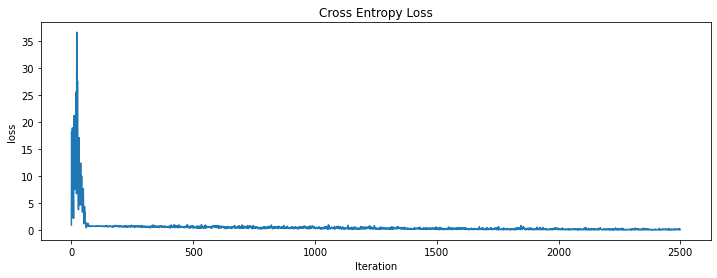

In [32]:
plt.figure(figsize=(12, 4))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('loss')
plt.title('Cross Entropy Loss');

### Analyze results

#### Accuracy on validation data

In [0]:
def evaluate_model(model, dataloader):
    model.eval()  # for batch normalization layers
    corrects = 0
    for inputs, targets in dataloader:
        inputs, targets = to_var(inputs, True), to_var(targets, True)
        outputs = model(inputs)
        _, preds = torch.max(outputs.data, 1)
        corrects += (preds == targets.data).sum()
    
    print('accuracy: {:.2f}'.format(100. * corrects / len(dataloader.dataset)))

In [34]:
evaluate_model(model, valid_dl)

/content/utils.py:21: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return Variable(x, volatile=volatile)


accuracy: 62.40


In [35]:
evaluate_model(model, train_dl)

/content/utils.py:21: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return Variable(x, volatile=volatile)


accuracy: 97.85


/content/utils.py:21: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return Variable(x, volatile=volatile)


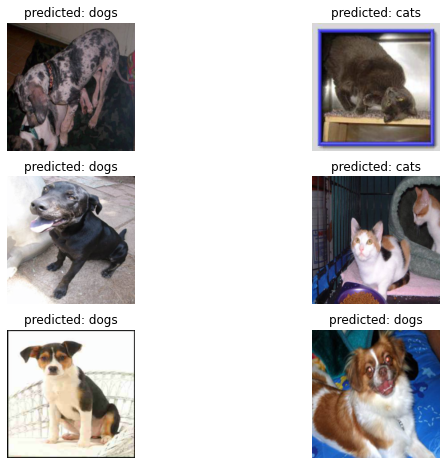

In [36]:
visualize_model(model, train_dl)

/content/utils.py:21: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return Variable(x, volatile=volatile)


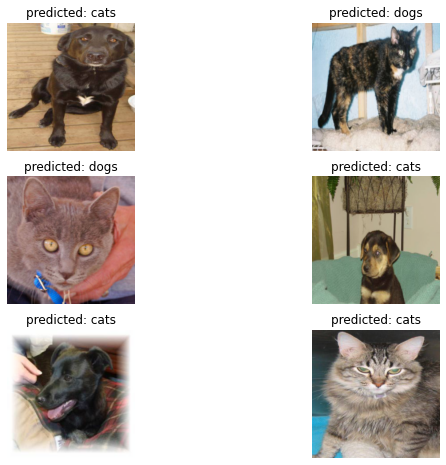

In [37]:
visualize_model(model, valid_dl)

  0%|          | 0/63 [00:00<?, ?it/s]/content/utils.py:21: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return Variable(x, volatile=volatile)
100%|██████████| 63/63 [00:05<00:00, 12.54it/s]


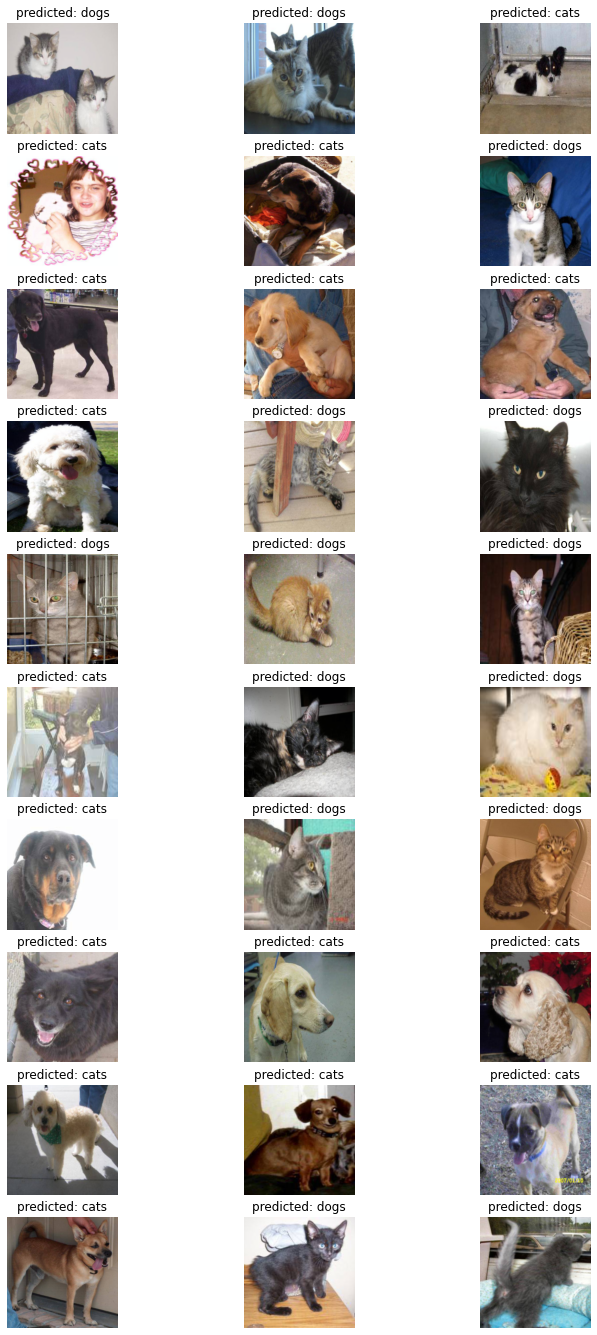

88 images out of 1000 were misclassified.


In [38]:
plot_errors(model, valid_dl)

#### Confusion matrix

  0%|          | 0/63 [00:00<?, ?it/s]/content/utils.py:21: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return Variable(x, volatile=volatile)
100%|██████████| 63/63 [00:04<00:00, 13.56it/s]


[[0.72 0.28]
 [0.47 0.53]]


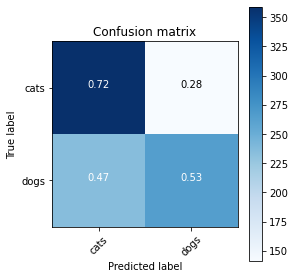

In [39]:
y_pred, y_true = predict_class(model, valid_dl)
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, train_ds.classes, normalize=True, figsize=(4, 4))

## Overfit

<div class="alert alert-success">
    <strong>What is OVERFIT? </strong>
    <ul>
        <li>The most important concept in ML!</li>
        <li>Simply, it means that your model is too complex for your problem.</li>
    </ul>
</div>

<h6>What we can do about it?</h6>

- Regularization
- Dropout
- Data Augmentation
- Transfer Learning

## Data Augmentation

<img src='https://github.com/itisalirh/Deep_Learning_in_Python_2018/blob/master/Week01/imgs/Augmentation.jpg?raw=1' width='90%'/>

<h6>Possible Transformations:</h6>
- Scaling
- Rotation
- Translation
- Flip horizontaly
- Random Crop
- Color jitter
- many more!

<img src='https://github.com/itisalirh/Deep_Learning_in_Python_2018/blob/master/Week01/imgs/Augmentation-Examples.jpg?raw=1' width='75%'/>

In [0]:
# Data augmentation and normalization for training
train_transforms = transforms.Compose([
    transforms.Resize((sz, sz)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(0.1, 0.1, 0.1, 0.01),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Just normalization for validation
valid_transforms = transforms.Compose([
    transforms.Resize((sz, sz)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_ds = datasets.ImageFolder(f'{DATA_DIR}train', train_transforms)
valid_ds = datasets.ImageFolder(f'{DATA_DIR}validation', valid_transforms)

train_dl = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)
valid_dl = torch.utils.data.DataLoader(valid_ds, batch_size=batch_size, shuffle=True)

train_ds_sz = len(train_ds)
valid_ds_sz = len(valid_ds)

print('Train size: {}\nValid size: {} ({:.2f})'.format(train_ds_sz, valid_ds_sz, valid_ds_sz/(train_ds_sz + valid_ds_sz)))

class_names = train_ds.classes

In [0]:
inputs, targets = next(iter(train_dl))     # Get a batch of training data
out = torchvision.utils.make_grid(inputs)  # Make a grid from batch
plt.figure(figsize=(16., 12.))
imshow(out, title='Augmented Images');

#### Look at the sizes of the images

In [0]:
fnames = glob.glob(f'{trn_dir}/*/*.jpg')
sizes = [Image.open(f).size for f in fnames]

hs, ws = list(zip(*sizes))

plt.figure(figsize=(12., 4.))
plt.hist(hs)
plt.hist(ws);

In [0]:
# create model
model = SimpleCNN()
if use_gpu:
    model = model.cuda()
    
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.002, momentum=0.9)

# train
model = train_model(model, train_dl, valid_dl, criterion, optimizer, num_epochs=5)

## Transfer Learning

- Use a CNN already trained on different data (e.g., [ImageNet](http://www.image-net.org/))
- Just Train the classifier weights (Last Layer)

<img src='https://github.com/itisalirh/Deep_Learning_in_Python_2018/blob/master/Week01/imgs/transfer-learning.jpg?raw=1' width='80%'/>

In [0]:
# load pre-trained ResNet18
model = load_pretrained_resnet50(model_path=None, num_classes=2)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.002, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.9)

In [0]:
model = train_model(model, train_dl, valid_dl, criterion, optimizer, scheduler, num_epochs=2)

In [0]:
evaluate_model(model, valid_dl)

In [0]:
visualize_model(model, valid_dl, num_images=6)

In [0]:
plot_errors(model, valid_dl)

## PROGRAMMING ASSIGNMENT 1

<div class="alert alert-success">
    <strong>[Plant Seeldlings Competition](https://www.kaggle.com/c/plant-seedlings-classification)</strong>
    <img src='https://github.com/itisalirh/Deep_Learning_in_Python_2018/blob/master/Week01/imgs/PlantSeedling.png?raw=1'/>
    <ul>
        <li><strong>Objective:</strong> getting a rank among top 50% in LB.</li>
        <li><strong>Ideas:</strong> different augmentations, different architectures, etc.</li>
        <li><strong>Important:</strong> share your ideas and progress on Piazz.</li>
    </ul>
</div>